In [4]:
import matplotlib
# matplotlib.use("pgf")
# matplotlib.rcParams.update({
#     "pgf.texsystem": "pdflatex",
#     'font.family': 'serif',
#     'text.usetex': True,
#     'pgf.rcfonts': False,
# })
import matplotlib.pyplot as plt
from plot_molecular_charge import Plotter
import sys
import numpy as np

from plot_molecular_charge import fit_maxwell, maxwell


cmap = plt.get_cmap("tab10")

plt.rcParams["font.size"] = 16 # 8

label = sys.argv[1] +'_' + sys.argv[2]

# slices = [-2.5, 0, 2.5, 5]
tt = 0
slices = [-7.5+tt, -5+tt, -2.5+tt, 0+tt]
# slices = [0, 15, 23]
energies = [200, 500, 500, 1000]
colrs = [cmap(i) for i in range(4)]

/Users/alaricsanders/Documents/Masters/AC4DC/scripts/plot_molecular_charge.py:496: RuntimeWarning: invalid value encountered in sqrt
  return n * np.sqrt(e/(np.pi*kT**3)) * np.exp(-e/kT)
/Users/alaricsanders/Documents/Masters/AC4DC/scripts/plot_molecular_charge.py:496: RuntimeWarning: invalid value encountered in sqrt
  return n * np.sqrt(e/(np.pi*kT**3)) * np.exp(-e/kT)


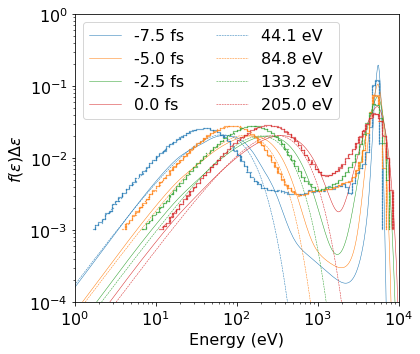

In [5]:
pl = Plotter('Carbon_HR1')

for (t, e, col ) in zip(slices, energies, colrs):
    lines = pl.plot_step(t, normed=True, color = col, lw=0.5)
    T = pl.plot_fit(t, e, normed=True, color=col, lw=0.5)

# pl.fig_steps.set_size_inches(3,2.5)
pl.fig_steps.set_size_inches(6,5)

pl.ax_steps.set_ylim([1e-4, 1])
pl.ax_steps.set_xlim([1,10000]) 

pl.fig_steps.subplots_adjust(bottom=0.15,left=0.2,right=0.95,top=0.95)
pl.ax_steps.xaxis.get_major_formatter().labelOnlyBase = False
pl.ax_steps.yaxis.get_major_formatter().labelOnlyBase = False


raw = np.genfromtxt("/Users/alaricsanders/Desktop/data_HR/Carbon_HR1.csv",skip_header=2,delimiter=',')

X1 = raw[:,0:2]
X2 = raw[:,2:4]
X3 = raw[:,4:6]
X4 = raw[:,6:8]

X1 = X1[X1[:,0].argsort()]
X2 = X2[X2[:,0].argsort()]
X3 = X3[X3[:,0].argsort()]
X4 = X4[X4[:,0].argsort()]

pl.ax_steps.plot(X1[:,0],X1[:,1],'.', label='-7.5fs, T=31eV',  color = cmap(0), markersize=0.5)
pl.ax_steps.plot(X2[:,0],X2[:,1],'.', label='-5fs, T=70eV',    color = cmap(1), markersize=0.5)
pl.ax_steps.plot(X3[:,0],X3[:,1],'.', label='-2.5fs, T=125eV', color = cmap(2), markersize=0.5)
pl.ax_steps.plot(X4[:,0],X4[:,1],'.', label='0fs, T=195eV',    color = cmap(3), markersize=0.5)

def add_curve(mat, fitE, **kwargs):
    fit = mat[:,0].searchsorted(fitE)
    Xdata = mat[:fit, 0]
    Ydata = mat[:fit, 1]/Xdata
    T, n = fit_maxwell(Xdata, Ydata)
    print(T, n)
    X = np.logspace(0,4,100)
    pl.ax_steps.plot(X, maxwell(X, T, n)*X,
        '--', **kwargs)

# add_curve(X1, 300,  color = cmap(0),lw=0.5)
# add_curve(X2, 500,  color = cmap(1),lw=0.5)
# add_curve(X3, 500,  color = cmap(2),lw=0.5)
# add_curve(X4, 1000, color = cmap(3),lw=0.5)



handles, labels = pl.ax_steps.get_legend_handles_labels()
order = [0,2,4,6,1,3,5,7]
# order = [0,2,4,1,3,5]

pl.ax_steps.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='upper left',ncol=2)



# labelLines(fitlines,align=True,xvals = [80,170,280,360])
# plt.savefig('/Users/alaric-mba/Desktop/free_distribution_evolution.png')
# plt.savefig('/Users/alaric-mba/Box Sync/Thesis/Figures/'+label+'_slices.pgf')